# Introduction to Image Manipulation in Python

In [2]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# file management
datpath = ("dataset")
fnames = os.listdir(datpath)
fnames.sort()

# show image ailes
for fname  in fnames:
    print(fname)
    fname = os.path.join(datpath, fname)
    # open image file
    img = Image.open(fname)
    img.show()

hammershoi_interior.jpg
kroyer_sommeraften.jpg
vangogh_starry_night.jpg
vangogh_wheat_field.jpg


In [11]:
fname = os.path.join(datpath, fnames[0])
img = Image.open(fname)

In [7]:
# show underlying matrix
M = np.asarray(img.convert('L'))
print(M)
print(M.shape)
np.savetxt("image-matrix.txt", M)

[[ 11  48  59 ...  57  85  70]
 [ 29  56  61 ... 104 119  86]
 [ 51  63  61 ... 100 104  66]
 ...
 [  6   6  12 ...  46  42  66]
 [  6   6  12 ...  49  39  59]
 [  6   6  12 ...  51  40  56]]
(908, 1000)


## Retrieve image size
Image.size gives a 2-tuple and the width, height can be obtained

In [8]:
with Image.open(fname) as fobj:
    width, height = fobj.size

print(
    "{} has dimensions w: {} and h: {}".format(
        os.path.basename(fname), width, height
        )
    )

hammershoi_interior.jpg has dimensions w: 1000 and h: 908


## Rotate image

In [9]:
img = Image.open(fname)
# Angle given
img = img.rotate(180)

# Saved in the same relative location
img.save("rotated_image.jpg")


## CROPPING AN IMAGE
Cropping an Image: Image.crop(box) takes a 4-tuple (left, upper, right,
lower) pixel coordinate, and returns a rectangular region from the used image.

In [12]:
img = Image.open(fname)
width, height = img.size
area = (0, 0, width/2, height/2)
img = img.crop(area)
# Saved in the same relative location
img.save("cropped_picture.jpg")
img.show()

## Resizing an Image
Image.resize(size)- Here size is provided as a 2-tuple width and height.

In [13]:
img = Image.open(fname)
width, height = img.size
img = img.resize((int(width/2), int(height/2)))
print(img.size)
# Saved in the same relative location
img.save("resized_picture.jpg")
img.show()

(500, 454)


## Introduction to Image Retrieval: Color Histogram

Getting a Histogram of an Image: This will return a histogram of the image as a list of pixel counts,
one for each pixel in the image. (A histogram of an image is a graphical representation of the tonal distribution in a digital image. It contains what all the brightness values contained in an image are.
It plots the number of pixels for each brightness value.

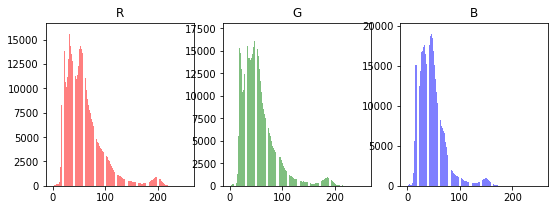

In [15]:
def chunks(l, n):
    """Yield successive n-sized chunks from l."""
    for i in range(0, len(l), n):
        yield l[i:i + n]

img = Image.open(fname)
# Getting histogram of image
X = img.histogram()

        
RGB = list(chunks(X, int(len(X)/3)))
color = ["r", "g", "b"]
fig, axs = plt.subplots(1,3, figsize=(9, 3), facecolor='w', edgecolor='k')
for i, x in enumerate(RGB):
    axs[i].bar(range(256), x, alpha=.5, color=color[i])
    axs[i].set_title(color[i].upper())

plt.show()
img.show()